In [2]:
import numpy as np
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt
from scipy import stats

survey_path = "CSCI_Fall_2024_survey.csv"
survey_df = pd.read_csv(survey_path)
survey_df.head(10)

,Timestamp,What is your name?,What are your pronouns?,What state/country were you born in?,How many siblings do you have?,How much experience do you have programming?,What class are you in?,Are you working while in school?,How many pets and of which kind do you have?,What is your favorite type of food?,Where do you live?,Do you take the metro?,What is your major?,How old are you?,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,"1, Dog",Japanese,Off campus,No,Computer Science,18,Friends,Persona Series,Anything about mythology,My major,cd and ls
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,0,Mexican,On campus,No,CS/Business,18,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls
2,2024/09/05 6:34:21 PM EST,Akshita,She/Her,"Frankfurt, Germany",1,0-3 months,Freshman,No,no pets!,Italian,On campus,No,Data Science,18,How I Met Your Mother,Mario Kart,Harry Potter,To learn programming for my major!,git commit
3,2024/09/05 6:35:03 PM EST,Anthony,He/Him,Wisconsin,1,0-3 months,Senior,Yes,I have two dogs and they are both at home,Italian,Off campus,No,Business Economics,21,Breaking Bad,Call of Duty,NaN,Programming has always been an interest of mine,ls
4,2024/09/05 6:35:56 PM EST,Nuri,He/Him,"st. louis, mo",2,1-2 years,Freshman,No,0,American,On campus,No,computer science,18,Hunter x Hunter,valorant,berserk,interested in having a career in data,ls
5,2024/09/05 6:35:57 PM EST,Mahley,She/Her,Missouri,1,0-3 months,Freshman,No,0,Japanese,On campus,No,Computer Science,18,The Office,until dawn,I don't read books,to become a software engineer,print
6,2024/09/05 6:36:02 PM EST,Chetan,He/Him,India,1,0-3 months,Freshman,No,none,Indian,On campus,No,cs/ finance,18,all of us are dead,minecraft,harry potter,its for my major,i dont know what that is
7,2024/09/05 6:36:13 PM EST,Steven,He/Him,St. Louis MO,1,6 months - 1 year,Freshman,Yes,NaN,Mexican,Off campus,No,Computer Science,18,X-Men 97,Devil Survivor 2 Overclocked,Series of Unfortunate Events - Reptile Room,To learn the basics of Coding since I only rea...,ls
8,2024/09/05 6:36:14 PM EST,Nico,multiple: he/him and they/them,"Missouri, USA",2,0-3 months,Freshman,Yes,1 dog and 1 cat,Chinese,On campus,Yes,Computer Science; considering an additional ma...,18,It's Always Sunny In Philadelphia,Pikmin,Percy Jackson,It's required for my major + I know nothing ab...,cd
9,2024/09/05 6:36:24 PM EST,Iovane,He/Him,Georgia (the country not the state),4,0-3 months,Freshman,Yes,"2 cats, one dog",Mexican,Off campus,No,Data Science,19,GOT,Minecraft,1984,Major Requirement,cd


In [25]:
survey_df.columns

Index(['Timestamp', 'What is your name?', 'What are your pronouns?',
       'What state/country were you born in?',
       'How many siblings do you have?',
       'How much experience do you have programming?',
       'What class are you in? ', 'Are you working while in school?',
       'How many pets and of which kind do you have?',
       'What is your favorite type of food?', 'Where do you live?',
       'Do you take the metro?', 'What is your major?', 'How old are you?',
       'What is your favorite TV show?', 'What is your favorite video game?',
       'What is your favorite book?', 'Why are you taking this class? ',
       'Whats your favorite bash command?'],
      dtype='object')

<Axes: ylabel='What is your name?'>

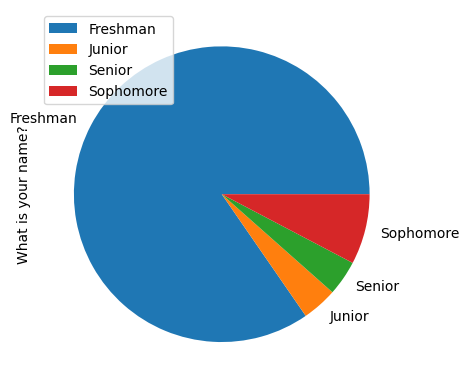

In [26]:
#Pie Chart (Class)
agg_class = survey_df.groupby("What class are you in? ").count()
agg_class.plot(kind = "pie", y = "What is your name?")

Text(0.5, 1.0, 'Favorite Cuisines in Class')

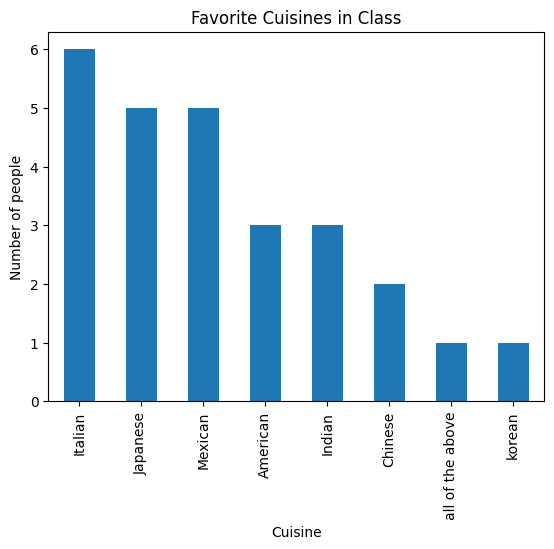

In [15]:
#Histogram (Food)
food_count = survey_df["What is your favorite type of food?"].value_counts()
food_count.plot(kind = "bar")
plt.xlabel("Cuisine")
plt.ylabel("Number of people")
plt.title("Favorite Cuisines in Class")

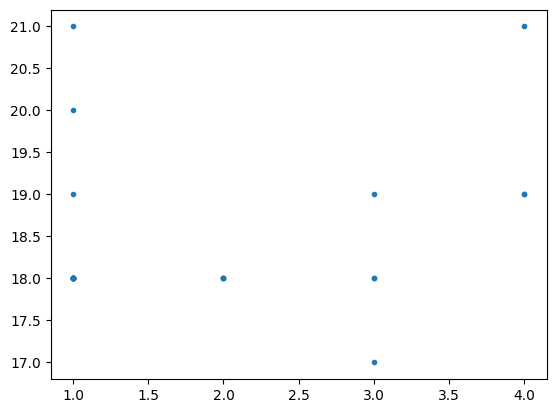

In [20]:
# Scatter plot (Age)
plt.plot(survey_df["How many siblings do you have?"], survey_df["How old are you?"], '.')
# correlate age and class
#age_count = survey_df["How old are you?"].value_counts()
#age_count.plot(kind = "bar")
#plt.xlabel("Age")
#plt.ylabel("Number of people")
#plt.title("Ages in the Class")

<Axes: ylabel='What is your name?'>

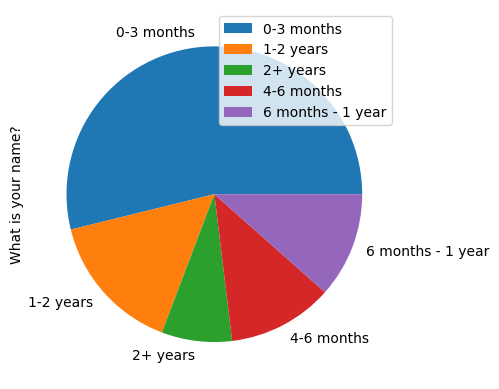

In [21]:
# Pie Chart (Programming length)
agg_length = survey_df.groupby("How much experience do you have programming?").count()
agg_length.plot(kind = "pie", y = "What is your name?")

(0.0, 22.0)

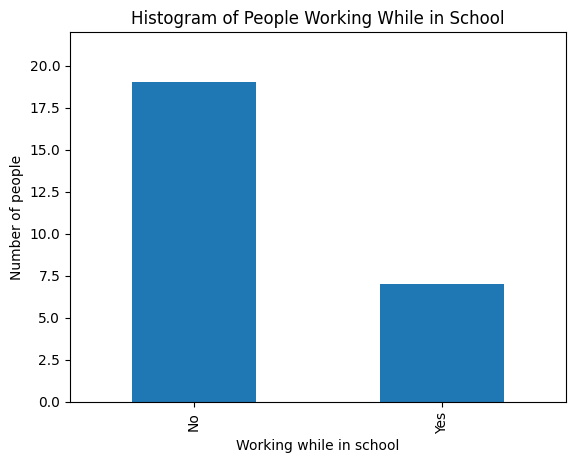

In [14]:
# Histogram (Working while in school)
work_count = survey_df["Are you working while in school?"].value_counts()
work_count.plot(kind = "bar")
plt.xlabel("Working while in school")
plt.ylabel("Number of people")
plt.title("Histogram of People Working While in School")
plt.set_yticks(np.arange(